In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_data_dir = 'mnist/train/'
test_data_dir = 'mnist/test/'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=train_batch_size,
    class_mode='categorical', 
    color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
 train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=test_batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.


In [3]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [4]:
print(x_train.shape, y_train.shape)

(20000, 28, 28, 1) (20000, 10)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
313/313 [==============================] - 10s 28ms/step - loss: 0.3675 - accuracy: 0.8953 - val_loss: 0.1441 - val_accuracy: 0.9595
Epoch 2/10
313/313 [==============================] - 9s 28ms/step - loss: 0.1219 - accuracy: 0.9646 - val_loss: 0.0941 - val_accuracy: 0.9705
Epoch 3/10
313/313 [==============================] - 9s 27ms/step - loss: 0.0767 - accuracy: 0.9776 - val_loss: 0.0715 - val_accuracy: 0.9800
Epoch 4/10
313/313 [==============================] - 8s 27ms/step - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0569 - val_accuracy: 0.9860
Epoch 5/10
313/313 [==============================] - 9s 27ms/step - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0620 - val_accuracy: 0.9810
Epoch 6/10
313/313 [==============================] - 8s 27ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0501 - val_accuracy: 0.9835
Epoch 7/10
313/313 [==============================] - 8s 26ms/step - loss: 0.0253 - accuracy: 0.9929 - val_loss: 0.0383 - val_accuracy: 0.987

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

63/63 [==============================] - 0s 7ms/step - loss: 0.0442 - accuracy: 0.9865
Test Loss:  0.044180456548929214
Test Accuracy:  0.9865000247955322


63/63 [==============================] - 0s 6ms/step
Actual Number:  6
Predicted Number:  6


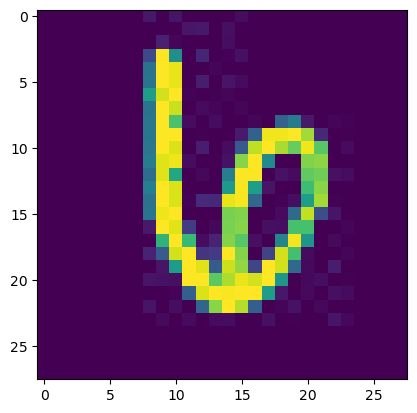

In [10]:
n = 30 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))